In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv("diamonds (1).csv")

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
data.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [7]:
data.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [8]:
data['L/W'] = data['length']/data['width']

In [9]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth %  53940 non-null  float64
 5   table %  53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
 10  L/W      53933 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB
None
(53940, 11)


In [10]:
print(data['cut'].unique().tolist())
print(data['clarity'].unique().tolist())
print(data['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [11]:
data.describe()#length ,width,l/w columns have 0 values

,carat,depth %,table %,price,length,width,depth,L/W
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


In [12]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        7
dtype: int64

In [13]:
data[['length','width','depth','L/W']]=data[['length','width','depth','L/W']].replace(0,np.NaN)

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64

In [16]:
data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


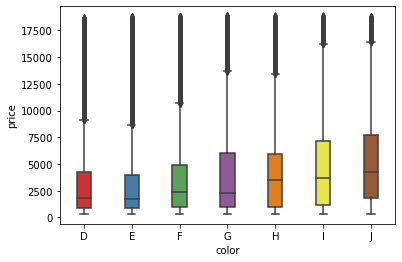

In [17]:
sns.boxplot(y='price',data=data,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

* From the above plot, we can see that G, H, I and J type color has less number of outliers compared to D and E

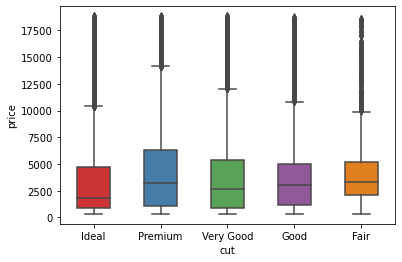

In [18]:
sns.boxplot(y='price',data=data,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

*  From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type. Also, each category type has the same maximum and minimum price.

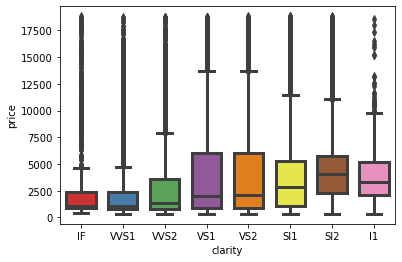

In [19]:
sns.boxplot(y='price',data=data,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

* we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.Also, each category type has the same maximum and minimum price.

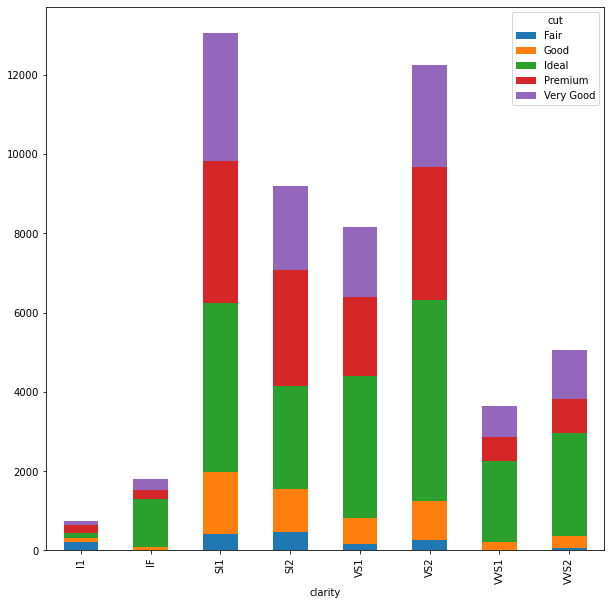

In [20]:
clarity_cut_table = pd.crosstab(index=data["clarity"], columns=data["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

* We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others . and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds.

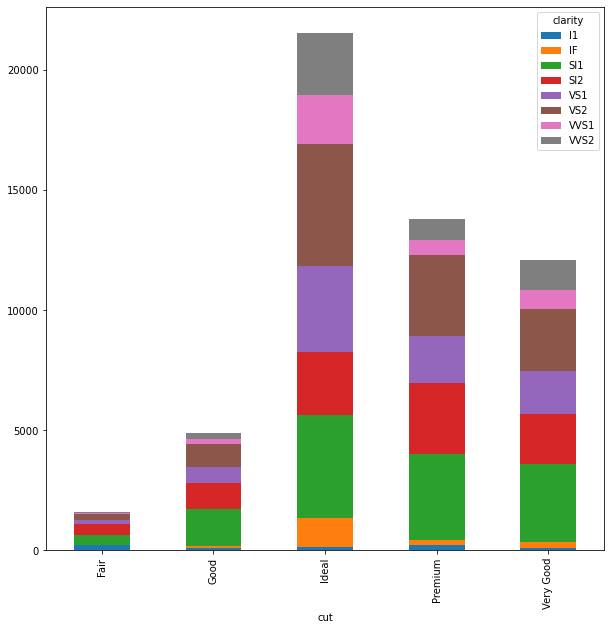

In [21]:
cut_clarity_table = pd.crosstab(index=data["cut"], columns=data["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

* We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.



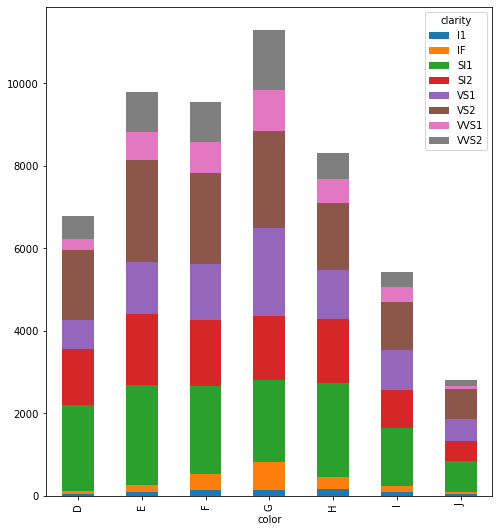

In [22]:
color_clarity_table = pd.crosstab(index=data["color"], columns=data["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(8,9),
                 stacked=True)

* We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.

* Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.

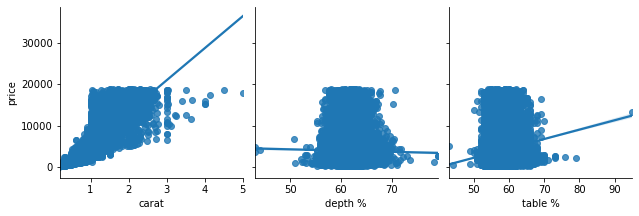

In [23]:
g= sns.pairplot(data , height=3, aspect =1, x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

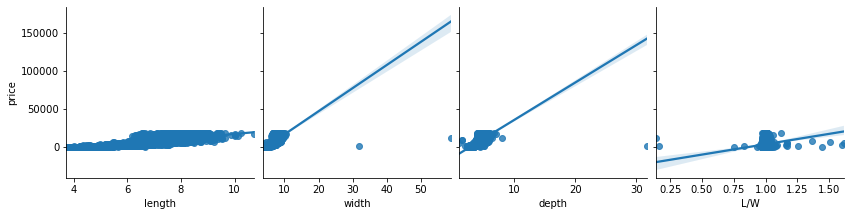

In [24]:
g= sns.pairplot(data , height=3, aspect =1, x_vars = ['length','width','depth','L/W'] , y_vars =  ['price'] , kind = 'reg')

* We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table %, depth %, and L/W are showing linearity but with high outliers.

In [25]:
data.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462


In [26]:
def CutEncoding(cut):
  value=-1
  if(cut=="Ideal"):
    value=4
  elif(cut=="Premium"):
    value=3
  elif(cut=="Good"):
    value=2
  elif(cut=="Very Good"):
    value=1
  elif(cut=="Fair"):
    value=0
  return value

print("Cut Feature Before Encoding:",*data['cut'].unique())
data['cut']=data['cut'].apply(lambda x:CutEncoding(x))
print("Cut Feature After Encoding:",*data['cut'].unique())

Cut Feature Before Encoding: Ideal Premium Good Very Good Fair
Cut Feature After Encoding: 4 3 2 1 0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
ColorEncoder=LabelEncoder()
print("Color Feature Before Encoding:",*data['color'].unique())
data.color=ColorEncoder.fit_transform(data.color)
print("Color Feature After Encoding:",*data['color'].unique())

Color Feature Before Encoding: E I J H F G D
Color Feature After Encoding: 1 5 6 4 2 3 0


In [29]:
ColorEncoder=LabelEncoder()
print("Color Feature Before Encoding:",*data['clarity'].unique())
data.clarity=ColorEncoder.fit_transform(data.clarity)
print("Color Feature After Encoding:",*data['clarity'].unique())

Color Feature Before Encoding: SI2 SI1 VS1 VS2 VVS2 VVS1 I1 IF
Color Feature After Encoding: 3 2 4 5 7 6 0 1


In [30]:
X = data.drop('price', axis=1)
y = data.price

In [31]:
X.head(1)

,carat,cut,color,clarity,depth %,table %,length,width,depth,L/W
0,0.23,4,1,3,61.5,55.0,3.95,3.98,2.43,0.992462


In [32]:
y.head(1)

0    326
Name: price, dtype: int64

* #from sklearn.preprocessing import StandardScaler
* cols=['carat', 'depth','table %'] #identifying the columns to be standardized
* for i in cols:
* fit the training data with standard scale
   # scale = StandardScaler().fit(data[[i]])
# standardize the numerical predictor columns in the dataframe
   # data[i] = scale.transform(data[[i]])

In [33]:
data.head(10)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W
0,0.23,4,1,3,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,2,1,4,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,2,6,3,63.3,58.0,335,4.34,4.35,2.75,0.997701
5,0.24,1,6,7,62.8,57.0,336,3.94,3.96,2.48,0.994949
6,0.24,1,5,6,62.3,57.0,336,3.95,3.98,2.47,0.992462
7,0.26,1,4,2,61.9,55.0,337,4.07,4.11,2.53,0.990268
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49,1.023810
9,0.23,1,4,4,59.4,61.0,338,4.00,4.05,2.39,0.987654


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
def minkowski_distance(a, b, p=1):
    
    
    dim = len(a)
    
   
    distance = 0
    
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance


# Test the function

minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

10.060558521775548

In [36]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))  

In [37]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 7, Max Accuracy = 96.36150861932154


In [38]:
clf = KNeighborsRegressor(n_neighbors = 7,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)
print(y_pred[0])

0.9636150861932155
483.66676658213055


In [39]:
y_train.head()

37046     967
6002     3959
41628     504
858      2871
53328    2654
Name: price, dtype: int64

* from sklearn import metrics
* metrics.mean_squared_error(y_test,y_pred)

In [40]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
        # Counter to help with label voting
        from collections import Counter
    
        # Make predictions on the test data
        # Need output of 1 prediction per test data point
        y_hat_test = []

           
        for test_point in X_test[:3]:
            distances = []
            print('first')   
            for train_point in X_train:
                distance = minkowski_distance(test_point, train_point, p=p)
                distances.append(distance)
            print('second')    
            # Store distances in a dataframe
            df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                            index=y_train.index)
            
            print('third')
            print(df_dists.shape)
            
            # Sort distances, and only consider the k closest points
            df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
            #print(df_nn)
            # Create counter object to track the labels of k closest neighbors
            counter = Counter(y_train[df_nn.index])
            #print(counter)
            
            
            df_nn['y_train_pred']=counter
            print('fourth')
            #print(df_nn)
            # Get most common label of all the nearest neighbors
            prediction = df_nn['y_train_pred'].mean()
           # print(prediction)
            # Append prediction to output list
            y_hat_test.append(prediction)
            #print(y_hat_test)
            #print(df_nn.mean(axis='index'))
            
         
        #df_dists.head(1)
        #print(df_nn)
        return y_hat_test

In [41]:
y_hat_test =knn_predict(X_train, X_test, y_train, y_test, k=7, p=1)#without sklearn
print(y_hat_test)

first
second
third
(40440, 1)
fourth
first
second
third
(40440, 1)
fourth
first
second
third
(40440, 1)
fourth
[491.85714285714283, 2947.8571428571427, 11414.857142857143]


In [42]:
clf = KNeighborsRegressor(n_neighbors = 7,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))   
y_pred = clf.predict(X_test)
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])

0.9636150861932155
483.66676658213055
2965.464777927421
11498.819248747497


In [43]:
class KNearestNeighbor():
    def __init__(self, k):
        self.k =k
    
    def train(self, X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        return self.predict_labels(distances)
    
    def compute_distance(self,X_test):
        num_test =  X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))
        
        for i in range(num_test):
            for j in range(num_train):
                distances[i,j] = np.sqrt(np.sum((X_test[i,:]-self.X_train[j,:])**2))
                
        return distances

    def predict_labels(self,distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            y_indices = np.argsort(distances[i,:])
            k_closet_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i] =np.argmax(np.bincount(k_closet_classes))
            
        return y_pred

In [44]:
def main():
    
    df = pd.read_csv( "diamonds.csv",nrows=1000)

    label =LabelEncoder()
    
    df["cut"]=label.fit_transform(df["cut"].astype('str'))
    df["color"]=label.fit_transform(df["color"].astype('str'))
    df["clarity"]=label.fit_transform(df["clarity"].astype('str'))

    #features
    X = df.drop('price',axis=1).values
    #target feature
    y = df['price'].values
    
    #spliting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None ) 
    
        
    ## Scaling
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #fiting the model 
    KNN = KNearestNeighbor(k=3)
    KNN.train(X_train,y_train)
    
    #prediction
    y_pred = KNN.predict(X_test)
    
    #check accuracy of model
    print('Accuracy of Scratch Model:',r2_score(y_test,y_pred))
    
    
    #fiting the model by sklearn
    knn = KNeighborsRegressor( n_neighbors = 3 ) 
    knn.fit( X_train, y_train )
    y_pred_sklearn = knn.predict( X_test )
    
    #check accuracy of sklearn model
    print('Accuracy of Sklearn Model:',r2_score(y_test,y_pred_sklearn))
   
    
    
if __name__=='__main__':
    main()

Accuracy of Scratch Model: 0.9941675273228654
Accuracy of Sklearn Model: 0.9965474430252849


* Conclusion:From scratch and sklearn I got almost same outputs for Y_pred and y_hat_test

In [46]:
!pip install plotly==5.10.0

  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [49]:
import plotly.graph_objs as go

In [50]:
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [51]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Normalized Price')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)
